# 1. 数据清洗

## 缺失值处理

In [80]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df1=pd.DataFrame([[3,5,6],[1,6,np.nan],["lili",np.nan,"pop"],[np.nan,"a","b"]])

In [5]:
df1

,0,1,2
0,3,5,6
1,1,6,NaN
2,lili,NaN,pop
3,NaN,a,b


In [6]:
df1.isnull()

,0,1,2
0,False,False,False
1,False,False,True
2,False,True,False
3,True,False,False


In [7]:
df1.isna()

,0,1,2
0,False,False,False
1,False,False,True
2,False,True,False
3,True,False,False


In [9]:
df1.notnull()

,0,1,2
0,True,True,True
1,True,True,False
2,True,False,True
3,False,True,True


In [10]:
df1.notna()

,0,1,2
0,True,True,True
1,True,True,False
2,True,False,True
3,False,True,True


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
0    3 non-null object
1    3 non-null object
2    3 non-null object
dtypes: object(3)
memory usage: 176.0+ bytes


In [15]:
df1.isnull().sum().sum()

3

In [16]:
df1.dropna()

,0,1,2
0,3,5,6


In [17]:
df1

,0,1,2
0,3,5,6
1,1,6,NaN
2,lili,NaN,pop
3,NaN,a,b


In [20]:
df1.dropna(how="all")
# how="all"参数删除全部字段都是缺失值的行

,0,1,2
0,3,5,6
1,1,6,NaN
2,lili,NaN,pop
3,NaN,a,b


In [21]:
df1.dropna(inplace=True)

In [22]:
df1

,0,1,2
0,3,5,6


In [37]:
df2=pd.DataFrame(np.arange(12).reshape(3,4))

In [24]:
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [38]:
df2.iloc[2]=np.nan
df2[3]=np.nan

In [34]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [39]:
df2.dropna(how="all")

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN


In [40]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [41]:
df2.dropna(how="all",axis=1)

,0,1,2
0,0.0,1.0,2.0
1,4.0,5.0,6.0
2,NaN,NaN,NaN


In [44]:
df2.fillna(0)

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,0.0,0.0,0.0,0.0


In [45]:
df2.fillna({1:6,3:0})

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [46]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [48]:
df2.fillna({1:6,3:0},inplace=True)

In [49]:
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [50]:
df2.fillna(method="ffill")

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,4.0,6.0,6.0,0.0


In [51]:
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [52]:
df2[0]=df2[0].fillna(df2[0].mean())

In [53]:
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,2.0,6.0,NaN,0.0


In [55]:
df2.fillna?
## 询问df2.fillna的参数类型

## 重复值

In [57]:
data={
    "name":["zhangsan","lisi","zhangsan","wangwu",],
    "sex":["female","male","female","male"],
    "year":[2001,2002,2001,2002],
    "city":["beijing","shanghai","beijing","beijing"]
}
df3=pd.DataFrame(data)

In [58]:
df3

,name,sex,year,city
0,zhangsan,female,2001,beijing
1,lisi,male,2002,shanghai
2,zhangsan,female,2001,beijing
3,wangwu,male,2002,beijing


In [59]:
df3.duplicated()

0    False
1    False
2     True
3    False
dtype: bool

In [60]:
df3.drop_duplicates()

,name,sex,year,city
0,zhangsan,female,2001,beijing
1,lisi,male,2002,shanghai
3,wangwu,male,2002,beijing


In [61]:
df3.drop_duplicates(["year","sex"])

,name,sex,year,city
0,zhangsan,female,2001,beijing
1,lisi,male,2002,shanghai


In [62]:
df3.drop_duplicates(["year","sex"],keep="last")

,name,sex,year,city
2,zhangsan,female,2001,beijing
3,wangwu,male,2002,beijing


## 替换值

In [63]:
data={
    "name":["zhangsan","lisi","wangwu","xiaoming"],
    "sex":["female","male","","male"],
    "year":[2001,2003,2001,2002],
    "city":["beijing","shanghai","","beijing"]
}
df4=pd.DataFrame(data)

In [64]:
df4

,name,sex,year,city
0,zhangsan,female,2001,beijing
1,lisi,male,2003,shanghai
2,wangwu,,2001,
3,xiaoming,male,2002,beijing


In [65]:
df4.replace("","unknown")

,name,sex,year,city
0,zhangsan,female,2001,beijing
1,lisi,male,2003,shanghai
2,wangwu,unknown,2001,unknown
3,xiaoming,male,2002,beijing


In [66]:
df4.replace(["",2001],["unkonwn",2002])
# 空白替换为unknown，2001替换为2002

,name,sex,year,city
0,zhangsan,female,2002,beijing
1,lisi,male,2003,shanghai
2,wangwu,unkonwn,2002,unkonwn
3,xiaoming,male,2002,beijing


In [67]:
df4.replace({"":"unknown",2001:2002})

,name,sex,year,city
0,zhangsan,female,2002,beijing
1,lisi,male,2003,shanghai
2,wangwu,unknown,2002,unknown
3,xiaoming,male,2002,beijing


## 利用函数或映射进行数据转换

In [70]:
data={
    "name":["zhangsan","lisi","wangwu","xiaoming"],
    "grade":[79,52,63,92]
}
df5=pd.DataFrame(data)

In [71]:
df5

,name,grade
0,zhangsan,79
1,lisi,52
2,wangwu,63
3,xiaoming,92


In [72]:
def f(x):
    if x>=90:
        return "优秀"
    elif x>=70:
        return "良好"
    elif x>=60:
        return "合格"
    else:
        return "不合格"

In [73]:
df5["class"]=df5.grade.map(f)

In [75]:
df5

,name,grade,class
0,zhangsan,79,良好
1,lisi,52,不合格
2,wangwu,63,合格
3,xiaoming,92,优秀


## 检测异常值

In [77]:
df6=pd.DataFrame(np.arange(10),columns=["x"])
df6["y"]=df6["x"]*2+0.5
df6.iloc[9,1]=185

In [78]:
df6

,x,y
0,0,0.5
1,1,2.5
2,2,4.5
3,3,6.5
4,4,8.5
5,5,10.5
6,6,12.5
7,7,14.5
8,8,16.5
9,9,185.0


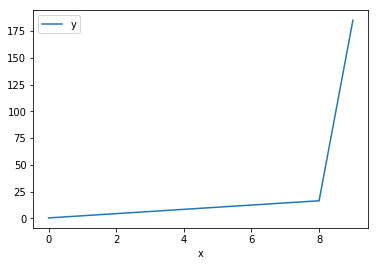

In [83]:
df6.plot(x="x",y='y')

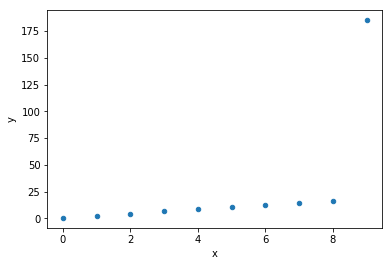

In [84]:
df6.plot(kind="scatter",x="x",y='y')

## 虚拟变量：分类变量的数值模拟

In [85]:
df7=pd.DataFrame({
    "direction":["east","south","east","west","north"],
    "price":[1200,2100,2300,2900,1400]
})

In [86]:
df7

,direction,price
0,east,1200
1,south,2100
2,east,2300
3,west,2900
4,north,1400


In [87]:
pd.get_dummies(df7.direction)

,east,north,south,west
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0


In [88]:
df8=pd.DataFrame({
    "direction":["east/north","west/south","east","west/north","north"],
    "price":[1200,2100,2300,2900,1400]
})

In [89]:
df8

,direction,price
0,east/north,1200
1,west/south,2100
2,east,2300
3,west/north,2900
4,north,1400


In [90]:
dummies=df8.direction.apply(lambda x:pd.Series(x.split('/')).value_counts())

In [91]:
dummies

,east,north,south,west
0,1.0,1.0,NaN,NaN
1,NaN,NaN,1.0,1.0
2,1.0,NaN,NaN,NaN
3,NaN,1.0,NaN,1.0
4,NaN,1.0,NaN,NaN


In [95]:
dummies.fillna(0,inplace=True)

In [96]:
dummies

,east,north,south,west
0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0


In [99]:
dummies=dummies.astype(int)

In [100]:
dummies

,east,north,south,west
0,1,1,0,0
1,0,0,1,1
2,1,0,0,0
3,0,1,0,1
4,0,1,0,0


In [104]:
pd.Series(df8.iloc[0].direction.split('/')).value_counts()

east     1
north    1
dtype: int64

# 2. 数据合并与重塑

In [32]:
import pandas as pd
import numpy as np

## merge合并

In [105]:
price=pd.DataFrame({
    "fruit":["apple","banana","orange"],
    "price":[23,32,45]
})
amount=pd.DataFrame({
    "fruit":["apple","banana","apple","apple","banana","pear"],
    "amount":[5,3,6,3,5,7]
})

In [106]:
price

,fruit,price
0,apple,23
1,banana,32
2,orange,45


In [107]:
amount

,fruit,amount
0,apple,5
1,banana,3
2,apple,6
3,apple,3
4,banana,5
5,pear,7


In [108]:
pd.merge(amount,price)

,fruit,amount,price
0,apple,5,23
1,apple,6,23
2,apple,3,23
3,banana,3,32
4,banana,5,32


In [109]:
pd.merge(amount,price,on="fruit")

,fruit,amount,price
0,apple,5,23
1,apple,6,23
2,apple,3,23
3,banana,3,32
4,banana,5,32


In [110]:
pd.merge(amount,price,left_on="fruit",right_on='fruit')

,fruit,amount,price
0,apple,5,23
1,apple,6,23
2,apple,3,23
3,banana,3,32
4,banana,5,32


In [111]:
pd.merge(amount,price,how="inner")

,fruit,amount,price
0,apple,5,23
1,apple,6,23
2,apple,3,23
3,banana,3,32
4,banana,5,32


In [112]:
pd.merge(amount,price,how="outer")

,fruit,amount,price
0,apple,5.0,23.0
1,apple,6.0,23.0
2,apple,3.0,23.0
3,banana,3.0,32.0
4,banana,5.0,32.0
5,pear,7.0,NaN
6,orange,NaN,45.0


In [113]:
pd.merge(amount,price,how="left")

,fruit,amount,price
0,apple,5,23.0
1,banana,3,32.0
2,apple,6,23.0
3,apple,3,23.0
4,banana,5,32.0
5,pear,7,NaN


In [114]:
pd.merge(amount,price,how="right")

,fruit,amount,price
0,apple,5.0,23
1,apple,6.0,23
2,apple,3.0,23
3,banana,3.0,32
4,banana,5.0,32
5,orange,NaN,45


In [117]:
amount2=pd.DataFrame({
    "fruit":["apple","banana","apple","apple","banana","pear"],
    "amount":[5,4,6,3.,5,7]
})
price2=pd.DataFrame({
    "fruit":["apple","banana","orange","apple"],
    "price":[23,32,45,25]
})

In [118]:
amount2

,fruit,amount
0,apple,5.0
1,banana,4.0
2,apple,6.0
3,apple,3.0
4,banana,5.0
5,pear,7.0


In [119]:
price2

,fruit,price
0,apple,23
1,banana,32
2,orange,45
3,apple,25


In [122]:
pd.merge(amount2,price2,how="inner")
## merge连接会产生笛卡尔积

,fruit,amount,price
0,apple,5.0,23
1,apple,5.0,25
2,apple,6.0,23
3,apple,6.0,25
4,apple,3.0,23
5,apple,3.0,25
6,banana,4.0,32
7,banana,5.0,32


In [121]:
pd.merge(amount2,price2,how="outer")

,fruit,amount,price
0,apple,5.0,23.0
1,apple,5.0,25.0
2,apple,6.0,23.0
3,apple,6.0,25.0
4,apple,3.0,23.0
5,apple,3.0,25.0
6,banana,4.0,32.0
7,banana,5.0,32.0
8,pear,7.0,NaN
9,orange,NaN,45.0


In [131]:
## 多个键值得合并
left=pd.DataFrame({
    "key1":["one","one","two"],
    "key2":['a','b','c'],
    "val1":[2,3,4]
})
right=pd.DataFrame({
    "key1":["one","one","two","two"],
    "key2":['a','a','a','b'],
    "val2":[5,6,7,8]
})

In [132]:
left

,key1,key2,val1
0,one,a,2
1,one,b,3
2,two,c,4


In [133]:
right

,key1,key2,val2
0,one,a,5
1,one,a,6
2,two,a,7
3,two,b,8


In [134]:
pd.merge(left,right)

,key1,key2,val1,val2
0,one,a,2,5
1,one,a,2,6


In [138]:
pd.merge(left,right,on=["key1"])

,key1,key2_x,val1,key2_y,val2
0,one,a,2,a,5
1,one,a,2,a,6
2,one,b,3,a,5
3,one,b,3,a,6
4,two,c,4,a,7
5,two,c,4,b,8


In [139]:
pd.merge(left,right,on=["key1"],suffixes=["_left","_right"])

,key1,key2_left,val1,key2_right,val2
0,one,a,2,a,5
1,one,a,2,a,6
2,one,b,3,a,5
3,one,b,3,a,6
4,two,c,4,a,7
5,two,c,4,b,8


In [136]:
pd.merge(left,right,on=["key1","key2"],how="inner")

,key1,key2,val1,val2
0,one,a,2,5
1,one,a,2,6


In [137]:
pd.merge(left,right,on=["key1","key2"],how="outer")

,key1,key2,val1,val2
0,one,a,2.0,5.0
1,one,a,2.0,6.0
2,one,b,3.0,NaN
3,two,c,4.0,NaN
4,two,a,NaN,7.0
5,two,b,NaN,8.0


In [149]:
## 用索引作为键值连接
left2=pd.DataFrame({
    "key":['a','a','b','b','c'],
    "val1":[0,1,2,3,4]
})
right2=pd.DataFrame({
    "val2":[5,7]
},index=['a','b'])

In [150]:
left2

,key,val1
0,a,0
1,a,1
2,b,2
3,b,3
4,c,4


In [151]:
right2

,val2
a,5
b,7


In [153]:
pd.merge(left2,right2,left_on="key",right_index=True)

,key,val1,val2
0,a,0,5
1,a,1,5
2,b,2,7
3,b,3,7


## 按行连接

In [160]:
left3=pd.DataFrame([0,1,2,3],index=list("abac"),columns=['val1'])
right3=pd.DataFrame([5,7],index=['a','b'],columns=['val2'])

In [161]:
left3

,val1
a,0
b,1
a,2
c,3


In [162]:
right3

,val2
a,5
b,7


In [163]:
left3.join(right3,how="inner")

,val1,val2
a,0,5
a,2,5
b,1,7


In [164]:
left3.join(right3,how="outer")

,val1,val2
a,0,5.0
a,2,5.0
b,1,7.0
c,3,NaN


### merge函数常用参数
* left 参与合并的左侧DataFrame
* right 参与合并的右侧DataFrame
* how 连接方法，可选inner，left，right，outer
* on 用于连接的列名
* left_on 左侧DataFrame中用于连接键的列名
* right_on 右侧DataFrame中用于连接的键的列名
* left_index 可选True/False,左侧DataFrame的行索引index作为连接键
* right_index 可选True/False，右侧DataFrame的行索引index作为连接键
* sort 连接后对数据进行排序，默认为True
* suffixes 修改重复的列名，用suffixes中的参数作为原来相同列名的后缀以区分

## concat连接
* 在无连接键的情况下默认按行堆叠数据
* 通过axis参数可以指定数据堆叠轴
* join参数（"inner"、"outer"）指定内连接（交集）或者外连接（并集）
* join_axes指定索引的使用顺序
* key参数指定层次化索引，或者在按列连接创建DataFrame时作为列名（列索引）
* 除了传入列表之外还可以传入字典直接连接，字典的键就是keys参数的值

In [2]:
s1=pd.Series([0,1],index=['a','b'])
s2=pd.Series([2,3],index=['c','d'])
s3=pd.Series([4,5],index=['e','f'])

In [3]:
s1

a    0
b    1
dtype: int64

In [4]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
dtype: int64

In [27]:
pd.concat([s1,s2,s3],axis=1,sort=True)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,NaN,4.0
f,NaN,NaN,5.0


In [6]:
pd.concat([s1,s2,s3],axis=1,join="inner")

,0,1,2


In [7]:
s4=pd.concat([s1*10,s3])

In [8]:
s4

a     0
b    10
e     4
f     5
dtype: int64

In [9]:
pd.concat([s1,s4],axis=1,join="inner")

,0,1
a,0,0
b,1,10


In [11]:
pd.concat([s1,s4],axis=1,join="inner",join_axes=[['b','a']])

,0,1
b,1,10
a,0,0


In [12]:
pd.concat([s1,s4])

a     0
b     1
a     0
b    10
e     4
f     5
dtype: int64

In [13]:
pd.concat([s1,s4],keys=['one','two'])

one  a     0
     b     1
two  a     0
     b    10
     e     4
     f     5
dtype: int64

In [16]:
pd.concat([s1,s4],axis=1,keys=["one","two"],sort=True)

,one,two
a,0.0,0
b,1.0,10
e,NaN,4
f,NaN,5


In [18]:
df10=pd.DataFrame([0,1,2],index=list('abc'),columns=["val1"])
df11=pd.DataFrame([5,7],index=list('ab'),columns=["val2"])

In [19]:
df10

,val1
a,0
b,1
c,2


In [20]:
df11

,val2
a,5
b,7


In [22]:
pd.concat([df10,df11],sort=True)

,val1,val2
a,0.0,NaN
b,1.0,NaN
c,2.0,NaN
a,NaN,5.0
b,NaN,7.0


In [25]:
pd.concat([df10,df11],axis=1,sort=True)

,val1,val2
a,0,5.0
b,1,7.0
c,2,NaN


In [26]:
pd.concat([df10,df11],axis=1,keys=["one","two"],sort=True)

,one,two
,val1,val2
a,0,5.0
b,1,7.0
c,2,NaN


In [30]:
pd.concat({"one":df10,"two":df11},sort=True)

val1  val2
one a   0.0   NaN
    b   1.0   NaN
    c   2.0   NaN
two a   NaN   5.0
    b   NaN   7.0

In [31]:
pd.concat({"one":df10,"two":df11},axis=1,sort=True)

,one,two
,val1,val2
a,0,5.0
b,1,7.0
c,2,NaN


In [37]:
df12=pd.DataFrame(np.random.randn(3,4),columns=list('abcd'))
df13=pd.DataFrame(np.random.randn(2,2),columns=list('dc'))

In [38]:
df12

,a,b,c,d
0,0.766001,1.808508,0.746289,1.180490
1,-3.386823,-0.815255,3.572610,-0.184711
2,1.182961,0.739739,-1.043488,0.589926


In [39]:
df13

,d,c
0,-0.694359,-1.023980
1,2.098207,0.743544


In [41]:
pd.concat([df12,df13],sort=True)

,a,b,c,d
0,0.766001,1.808508,0.746289,1.180490
1,-3.386823,-0.815255,3.572610,-0.184711
2,1.182961,0.739739,-1.043488,0.589926
0,NaN,NaN,-1.023980,-0.694359
1,NaN,NaN,0.743544,2.098207


In [44]:
pd.concat([df12,df13],ignore_index=True,sort=True)

,a,b,c,d
0,0.766001,1.808508,0.746289,1.180490
1,-3.386823,-0.815255,3.572610,-0.184711
2,1.182961,0.739739,-1.043488,0.589926
3,NaN,NaN,-1.023980,-0.694359
4,NaN,NaN,0.743544,2.098207


## combine_first合并
combine_first合并方法用于解决需要合并的两个DataFrame中有重复索引的问题，例如执行df1=df2.combine_first(df2),即是用df2对df1中确实的数据进行打补丁，df1中原有的数据不改动，df1中缺失而df2中存在的数据则用df2中的数据填充

In [46]:
df14=pd.DataFrame({
    'a':[3.0,np.nan,6.0,np.nan],
    'b':[np.nan,4.0,6.0,np.nan]
})
df15=pd.DataFrame({
    'a':[0,1,2,3,4],
    'b':[0,1,2,3,4],
})

In [48]:
df14

,a,b
0,3.0,NaN
1,NaN,4.0
2,6.0,6.0
3,NaN,NaN


In [49]:
df15

,a,b
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [50]:
df14.combine_first(df15)

,a,b
0,3.0,0.0
1,1.0,4.0
2,6.0,6.0
3,3.0,3.0
4,4.0,4.0


In [52]:
df15.combine_first(df14)

,a,b
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


## 数据重塑
DataFrame数据结构的重塑：
* 列旋转为行 stack()
* 行旋转为列 unstack()

In [55]:
df16=pd.DataFrame(np.arange(9).reshape(3,3),index=list('abc'),columns=["one","two","three"])
df16.index.name="alpha"
df16.columns.name="number"

In [56]:
df16

number,one,two,three
alpha,,,
a,0,1,2
b,3,4,5
c,6,7,8


In [58]:
df17=df16.stack()

In [59]:
df17

alpha  number
a      one       0
       two       1
       three     2
b      one       3
       two       4
       three     5
c      one       6
       two       7
       three     8
dtype: int32

In [60]:
type(df17)

pandas.core.series.Series

In [61]:
df17.unstack()

number,one,two,three
alpha,,,
a,0,1,2
b,3,4,5
c,6,7,8


In [62]:
df17.unstack(0)

alpha,a,b,c
number,,,
one,0,3,6
two,1,4,7
three,2,5,8


In [64]:
df17.unstack("alpha")

alpha,a,b,c
number,,,
one,0,3,6
two,1,4,7
three,2,5,8


In [69]:
df18=pd.DataFrame(np.arange(16).reshape(4,4),
                 index=[["one","one","two","two"],["a","b","a","b"]],
                 columns=[["apple","apple","orange","orange"],["red","green","red","green"]],
                 )

In [70]:
df18

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [71]:
df18.stack()

apple  orange
one a green      1       3
      red        0       2
    b green      5       7
      red        4       6
two a green      9      11
      red        8      10
    b green     13      15
      red       12      14

In [72]:
df18.stack().stack()

one  a  green  apple      1
               orange     3
        red    apple      0
               orange     2
     b  green  apple      5
               orange     7
        red    apple      4
               orange     6
two  a  green  apple      9
               orange    11
        red    apple      8
               orange    10
     b  green  apple     13
               orange    15
        red    apple     12
               orange    14
dtype: int32

In [74]:
df18.unstack()

apple               orange              
      red     green        red     green    
        a   b     a   b      a   b     a   b
one     0   4     1   5      2   6     3   7
two     8  12     9  13     10  14    11  15

In [75]:
df18.unstack().unstack()

apple   red    a  one     0
                  two     8
               b  one     4
                  two    12
        green  a  one     1
                  two     9
               b  one     5
                  two    13
orange  red    a  one     2
                  two    10
               b  one     6
                  two    14
        green  a  one     3
                  two    11
               b  one     7
                  two    15
dtype: int32

# 3. 字符串处理

## pandas字段的str属性的各种方法可以直接运用到整个字段的所有元素中，即进行矢量化操作

In [78]:
data={
    "data":["zhangsan|male","lisi|female","wangwu|female","zhaoliu|male"]
}
df19=pd.DataFrame(data)

In [79]:
df19

,data
0,zhangsan|male
1,lisi|female
2,wangwu|female
3,zhaoliu|male


In [80]:
result=df19["data"].apply(lambda x:pd.Series(x.split('|')))

In [81]:
result

,0,1
0,zhangsan,male
1,lisi,female
2,wangwu,female
3,zhaoliu,male


In [82]:
df20=df19["data"].str.split('|')

In [83]:
df20

0    [zhangsan, male]
1      [lisi, female]
2    [wangwu, female]
3     [zhaoliu, male]
Name: data, dtype: object

In [84]:
df19["name"]=df20.str[0]
df19["sex"]=df20.str[1]

In [85]:
df19

,data,name,sex
0,zhangsan|male,zhangsan,male
1,lisi|female,lisi,female
2,wangwu|female,wangwu,female
3,zhaoliu|male,zhaoliu,male


## 正则表达式

In [86]:
df21=pd.DataFrame({
    "email":["102345@qq.com","342167@qq.com","65312@qq.com"]
})

In [87]:
df21

,email
0,102345@qq.com
1,342167@qq.com
2,65312@qq.com


In [88]:
df21.email.str.findall('(.*?)@')

0    [102345]
1    [342167]
2     [65312]
Name: email, dtype: object

In [90]:
df21["QQ"]=df21.email.str.findall('(.*?)@').str.get(0)

In [91]:
df21

,email,QQ
0,102345@qq.com,102345
1,342167@qq.com,342167
2,65312@qq.com,65312


# 4. 综合示例_Iris数据集

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
iris_data=pd.read_csv("./data/iris-data.csv")

In [94]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
iris_data["class"].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [99]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [100]:
iris_data.shape

(150, 5)

In [101]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 数据清洗

In [102]:
iris_data["class"].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [162]:
iris_data.loc[iris_data["class"]=="versicolor","class"]="Iris-versicolor"
iris_data.loc[iris_data["class"]=="Iris-setossa","class"]="Iris-setosa"

In [141]:
iris_data["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


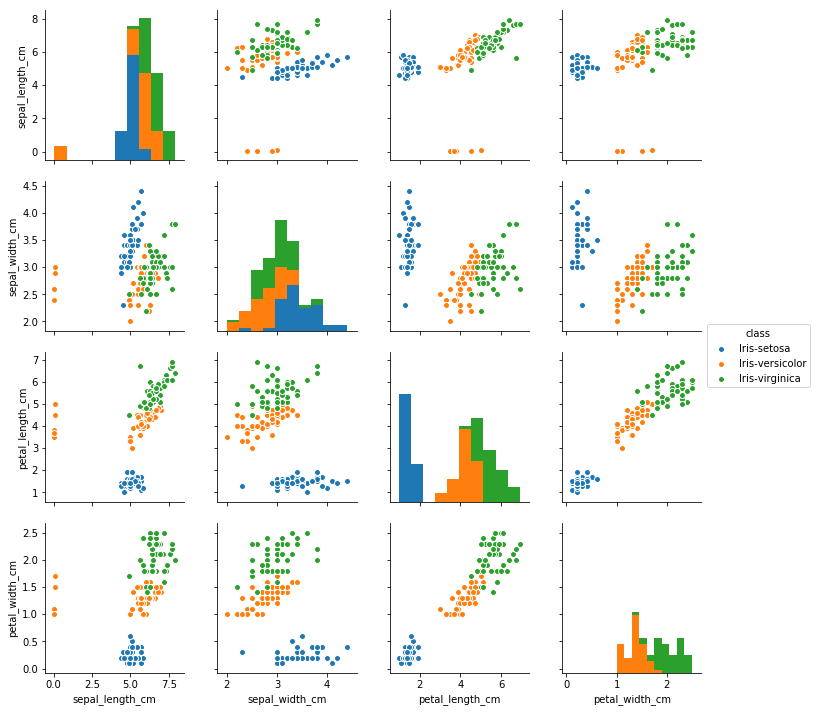

In [108]:
sns.pairplot(iris_data,hue="class")

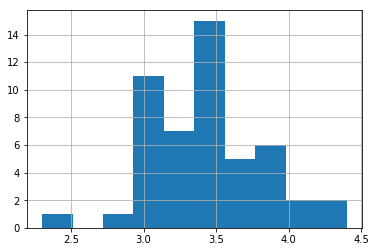

In [142]:
iris_data.loc[iris_data["class"]=="Iris-setosa","sepal_width_cm"].hist()

In [163]:
# 通过上图可以看到小于2.5cm的数据是明显的异常值，但是不清楚产生的原因，可以直接过滤
index=((iris_data["class"]=="Iris-setosa")&(iris_data["sepal_width_cm"]<2.5))
index=index.apply(lambda x:not x)
iris_data=iris_data[index]

In [134]:
iris_data.shape

(149, 5)

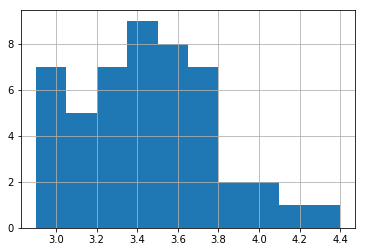

In [135]:
iris_data.loc[iris_data["class"]=="Iris-setosa","sepal_width_cm"].hist()

In [143]:
# 通过第一列和第一行发现sepal_length_cm数据很小，猜测可能是单位错误，通过乘100放大实验效果
iris_data.loc[(iris_data["class"]=="Iris-versicolor")&(iris_data["sepal_length_cm"]<0.1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [164]:
iris_data.loc[(iris_data["class"]=="Iris-versicolor")&(iris_data["sepal_length_cm"]<0.1),"sepal_length_cm"]*=100

In [148]:
iris_data.loc[(iris_data["class"]=="Iris-versicolor")&(iris_data["sepal_length_cm"]<0.1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [151]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [165]:
iris_data.dropna(inplace=True)

In [166]:
iris_data.shape

(144, 5)

In [167]:
# 保存清洗好的数据
iris_data.to_csv("./data/iris-clean-data.csv",index=False)

## 数据探索

In [168]:
iris_data=pd.read_csv("./data/iris-clean-data.csv")

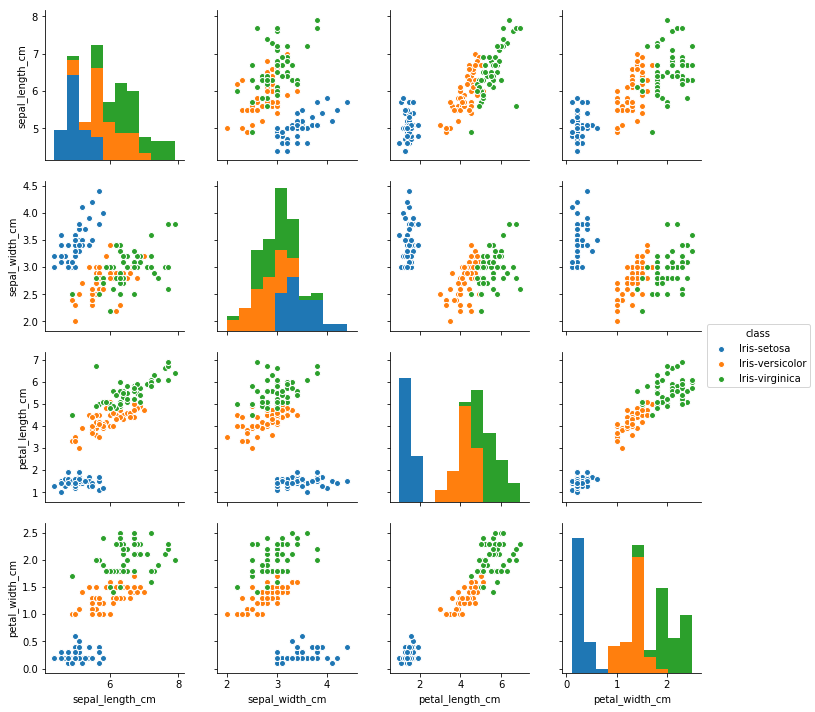

In [169]:
sns.pairplot(iris_data,hue="class")

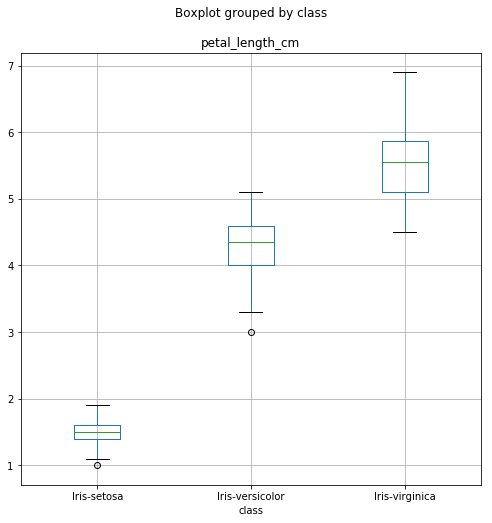

In [172]:
iris_data.boxplot(column="petal_length_cm",by="class",grid=True,figsize=(8,8))

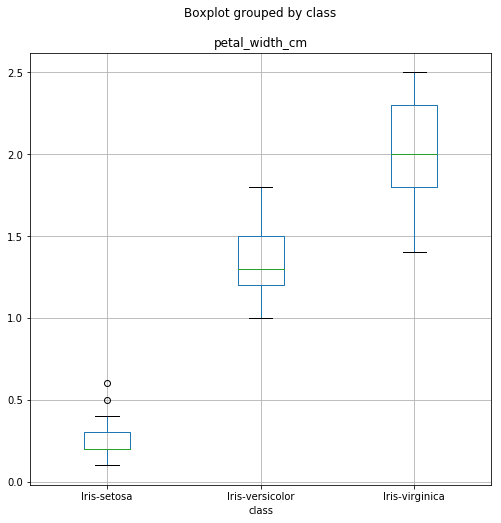

In [173]:
iris_data.boxplot(column="petal_width_cm",by="class",grid=True,figsize=(8,8))